# Title: Bank Marketing (with social/economic context)

# Initializing and importing modules for exploratory analysis

In this section I load the main Python libraries for database manipulation and visualization. These are the libraries: Numpy, Pandas, Matplotlib and Seaborn.

In [1]:
import numpy as np   #Importing Numpy
import pandas as pd  #Importing Pandas

#Data visualization
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)                #Use big fonts and big plots
plt.rcParams['figure.figsize'] = (10.0,10.0)    
matplotlib.rc('figure', facecolor='white')

import seaborn as sns #Importing Seaborn

# Loading the database for exploratory analysis

I use the Pandas library to visualize the first rows and the columns of the database under study. The database is stored in the same folder as the project, so I only have to call it by using the basic command pandas.read_csv("path/to/file"). I print the header of the database, showing the first 5 rows and the columns.

In [2]:
dataframe = pd.read_csv('bank.csv') #Importing the database
dataframe.head() #Visualize the first 5 rows and the colunms of the database

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Exploratory analysis

First, I am going to check if there are missing values within the columns of the database. To that end, I build the function "check_missing_values" that takes as argument the database and gives as a result a dataframe with the name of the columns and the missing percent of values, let's say, the appearance frequency of the "NaN" symbol.

In [49]:
def check_missing_values(df,cols=None,axis=0):
    ### This function check out for missing values in each column
    ## Arguments:
                #df: data frame
                #cols: list. List of column names
                #axis: int. 0 means column and 1 means row
    
    # This function returns the missing info as a dataframe 
    
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False) 

check_missing_values(dataframe,cols=None,axis=0)

,missing_num,missing_percent
age,0,0.0
education_illiterate,0,0.0
education_university.degree,0,0.0
education_unknown,0,0.0
default_no,0,0.0
default_yes,0,0.0
housing_no,0,0.0
housing_unknown,0,0.0
loan_no,0,0.0
contact_cellular,0,0.0


,0,1
y,0.887346,0.112654


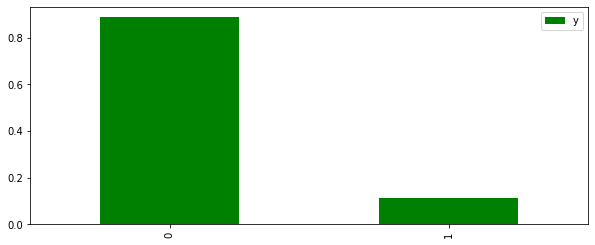

In [4]:
loan = dataframe["y"].value_counts(normalize=True).to_frame()
plt.rcParams['figure.figsize'] = (10.0, 4.0)    # ... and big plots
loan.plot.bar(color='g')
loan.T

In [5]:
def compare_category(df,colname,targetname):
    ### This function checks the target value difference of a given cathegory in the case
    ### of binary classifications.
    
    ## Arguments:
    # df: is a data frame.
    # colname: is a string. The column name to be evaluated.
    # targetname: is a string. The column name of the target variable.
    
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum', 'mean'])
    df_cate.reset_index(inplace=True)
    #print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(20, 8))
    plt1 = sns.lineplot(x=colname, y="mean", data=df_cate,color="b")
    plt.xticks(size=20,rotation=90)
    plt.yticks(size=20,rotation=0)
    
    for tl in ax.get_yticklabels():
        tl.set_color('b')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)

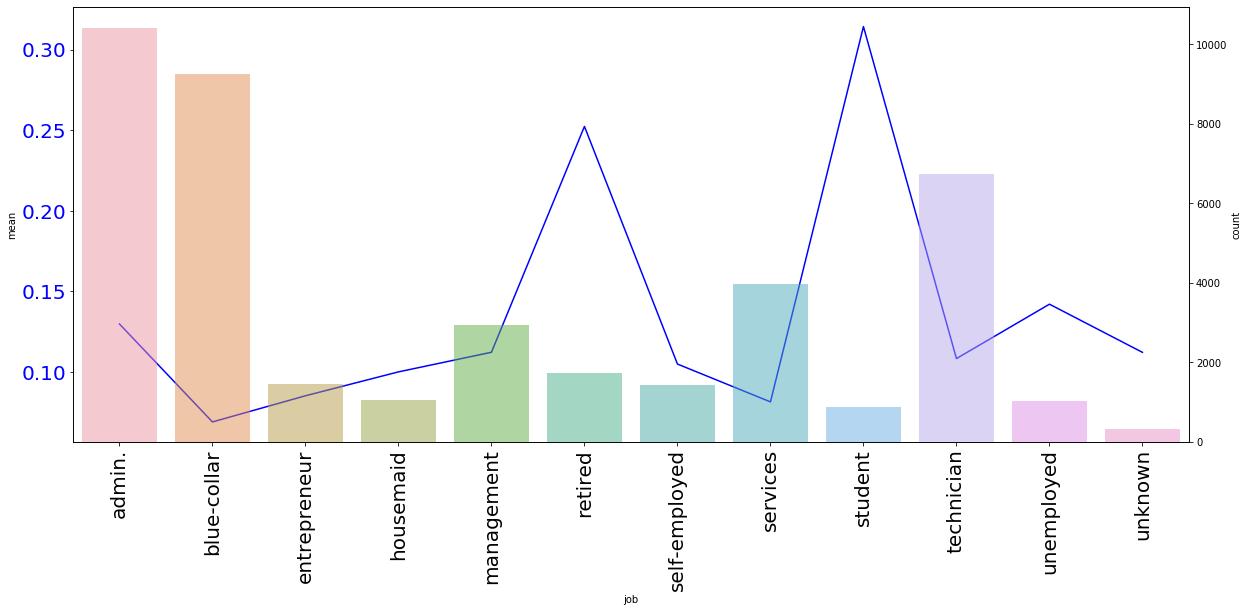

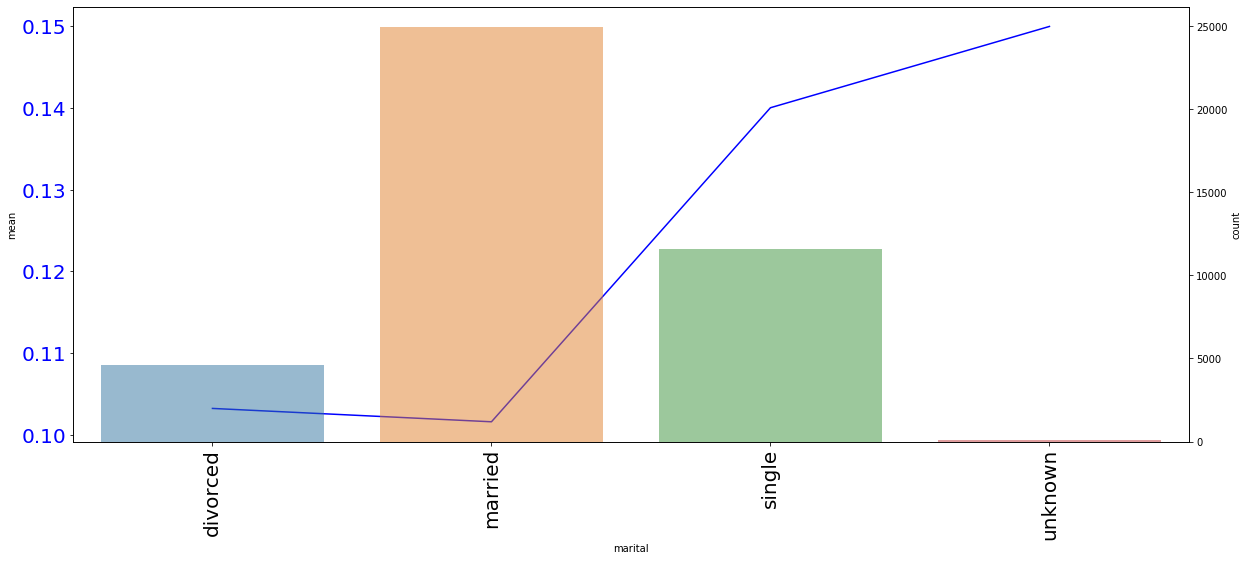

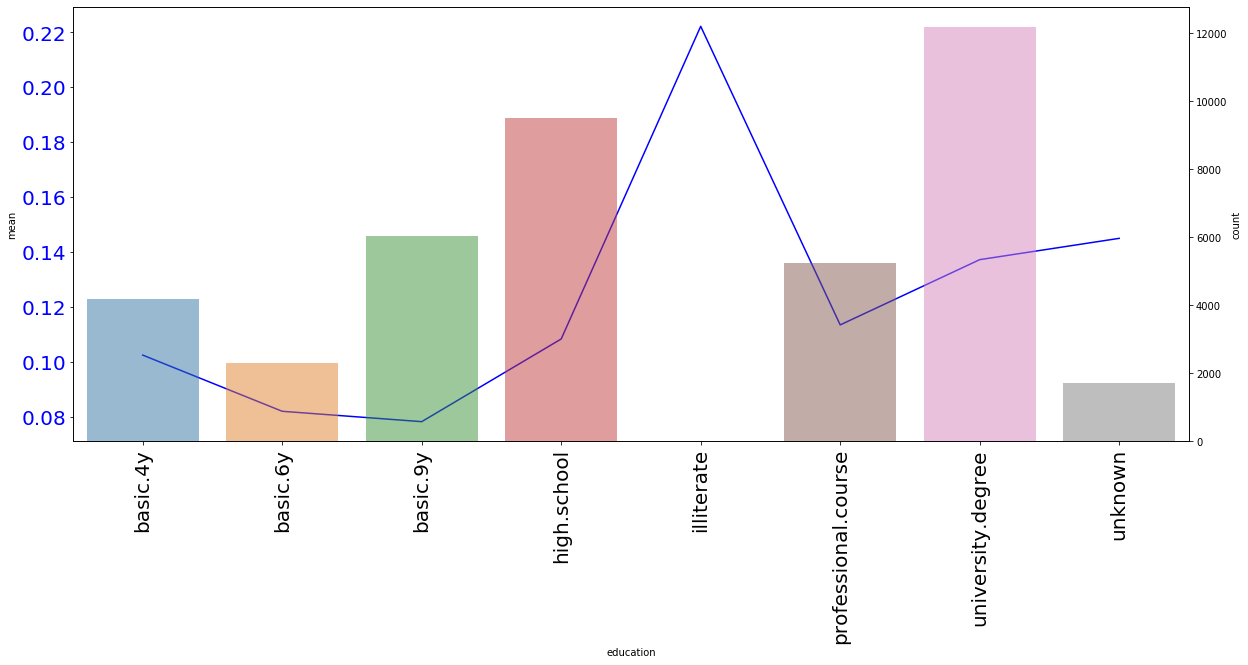

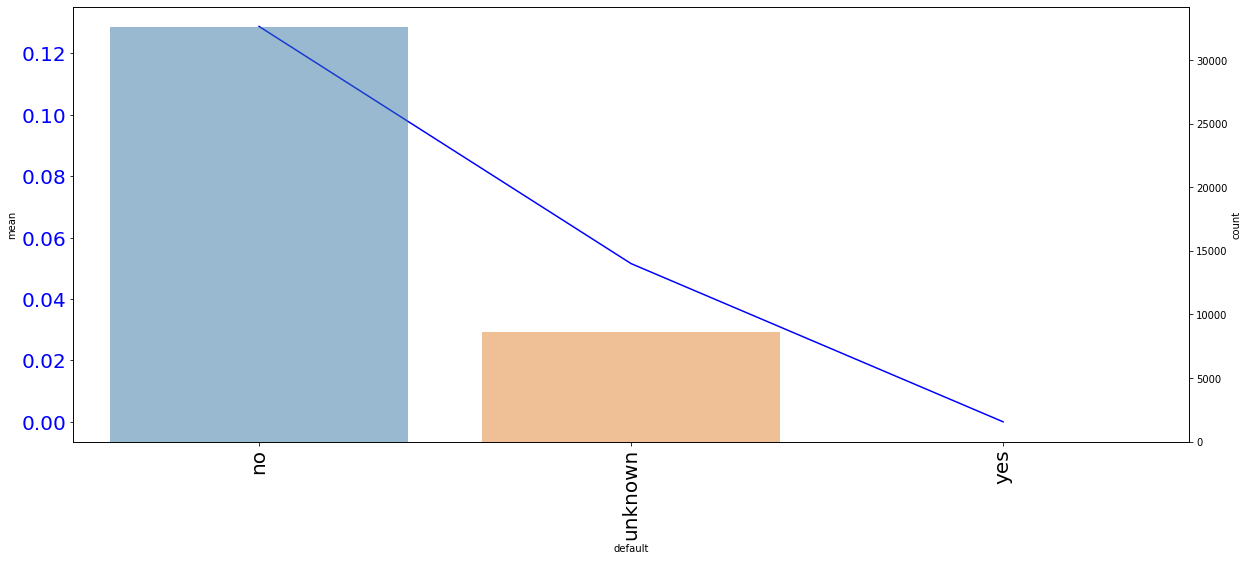

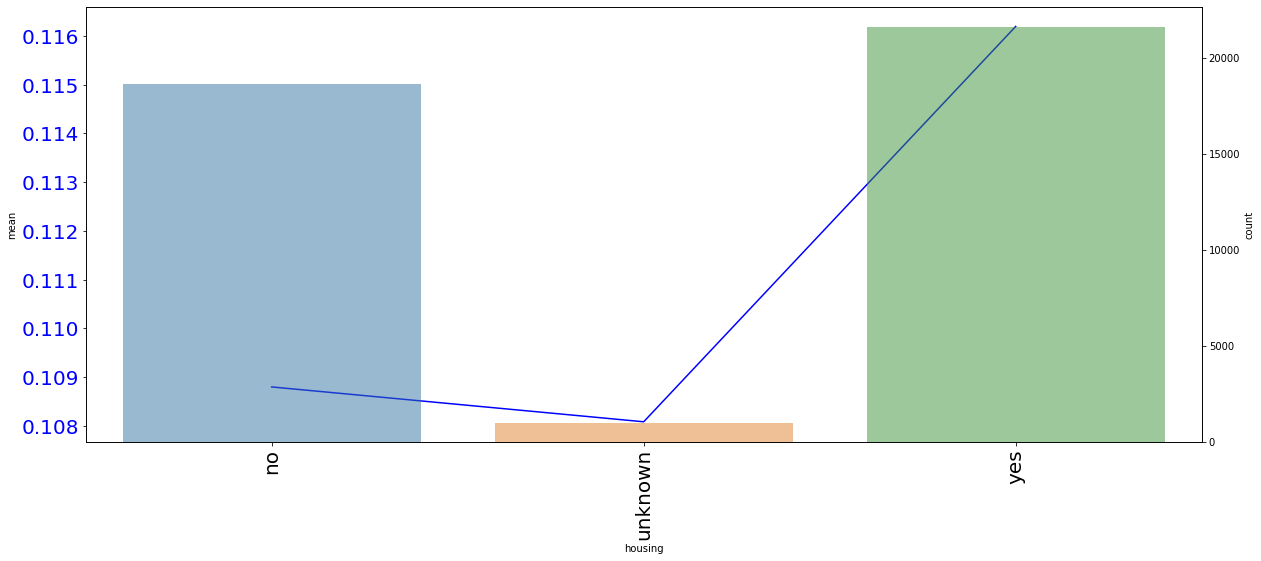

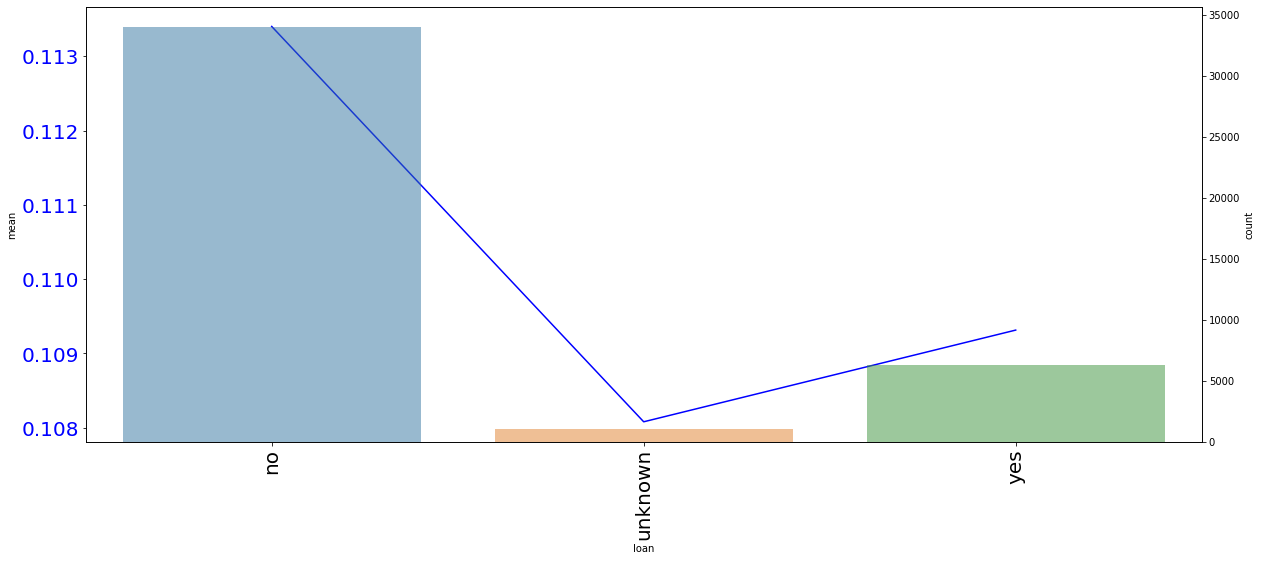

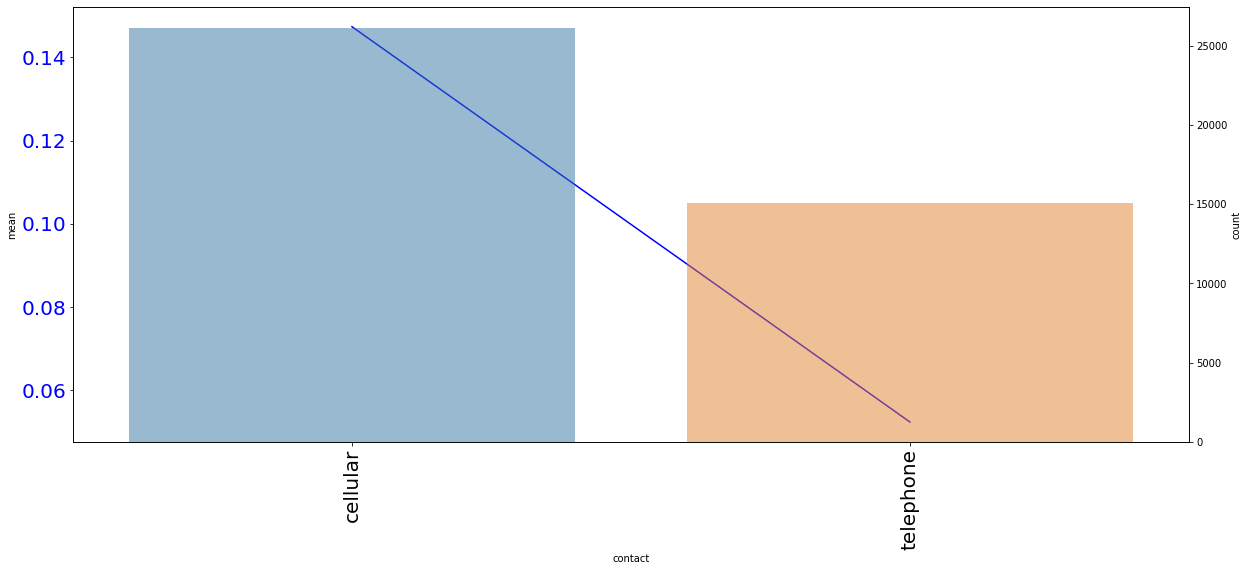

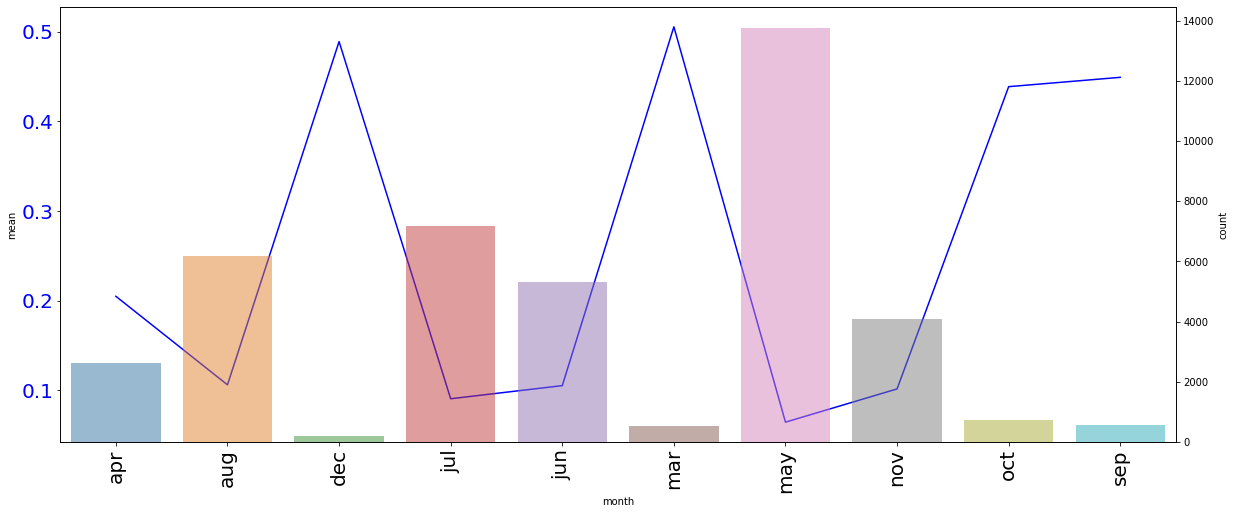

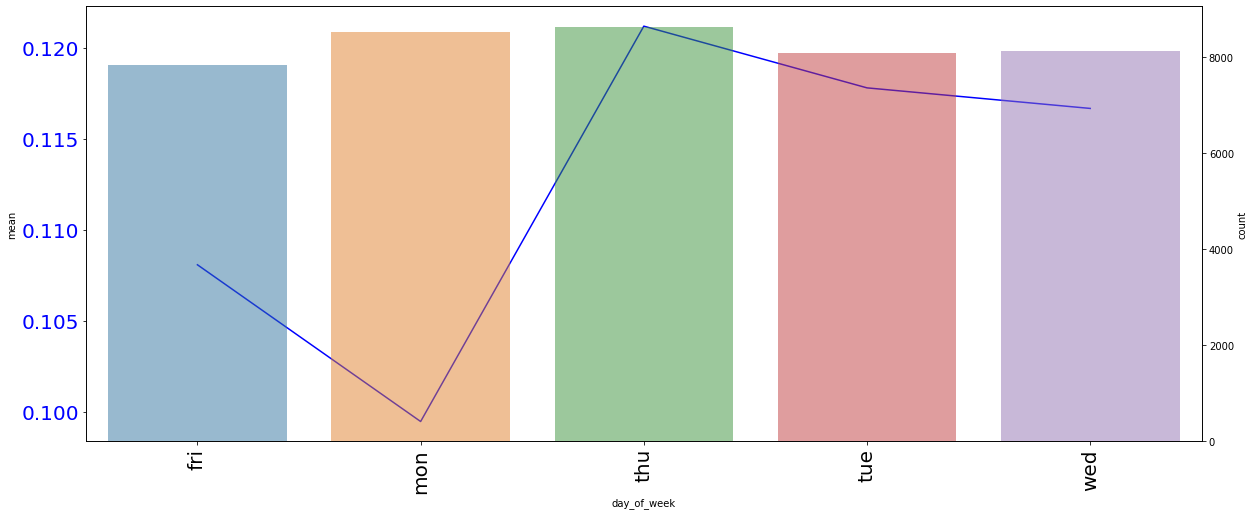

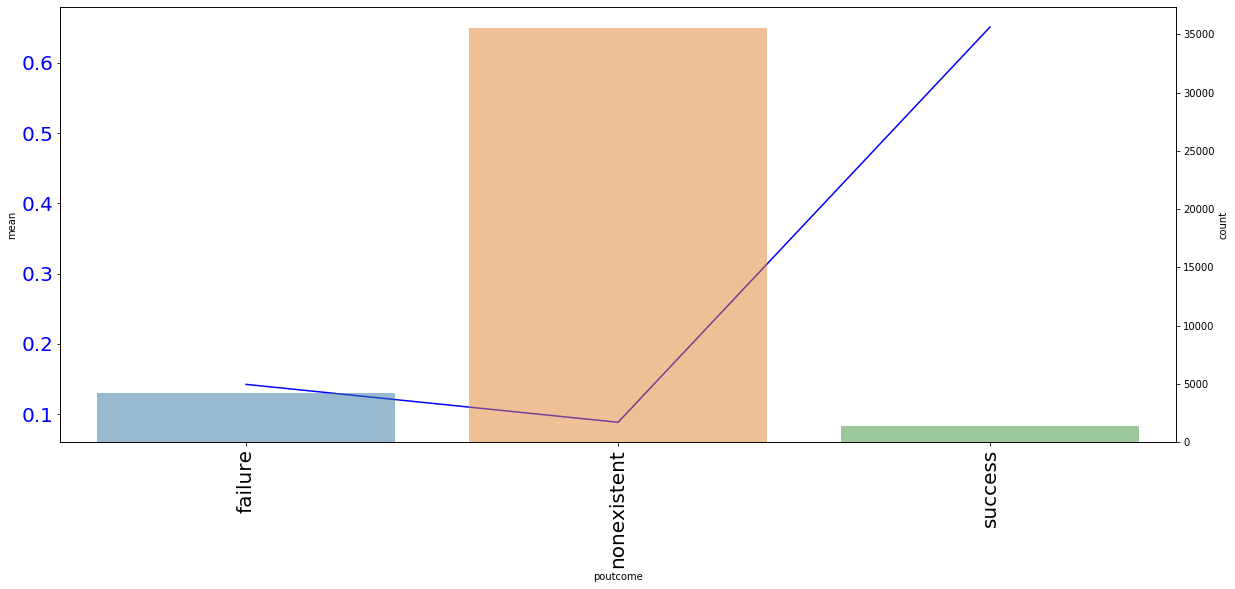

In [6]:
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for el in cat_vars:
    compare_category(dataframe,el,"y")

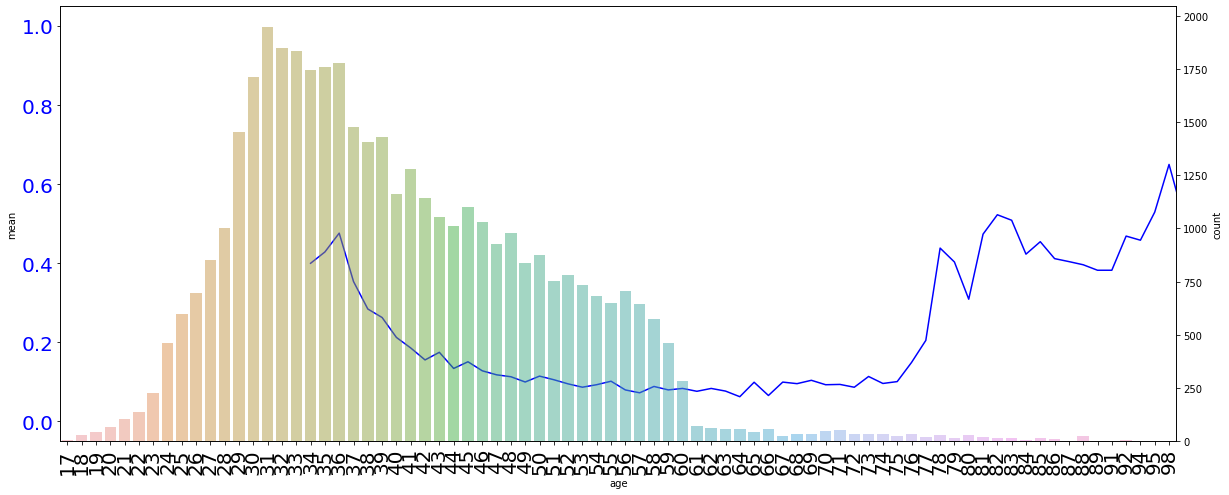

In [7]:
compare_category(dataframe,"age","y")

In [8]:
dataframe=pd.get_dummies(dataframe)

In [9]:
dataframe

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [10]:
dataframe.shape

(41188, 64)

# kNN Algorithm

In [11]:
#Loading the library sklearn to perform a kNN analysis
from sklearn.neighbors import KNeighborsClassifier

# Evaluating the accuracy of the performed analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Text(0.5, 1.0, 'k-Nearest Neighbor parameter vs. Accuracy')

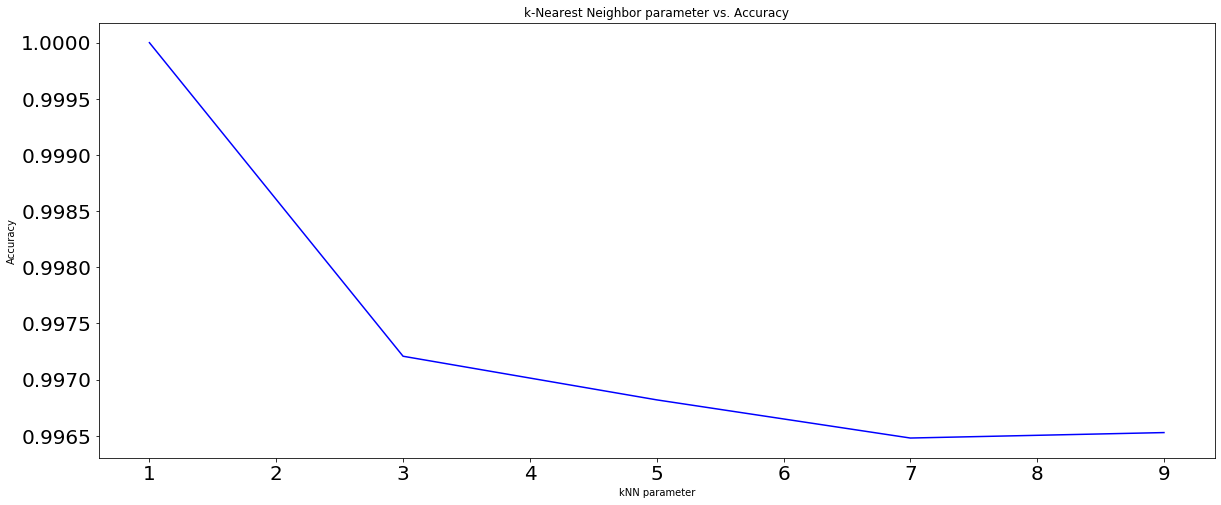

In [12]:
accuracy_kNN_to_plot = []

#Setting up the training variables.
X = dataframe.iloc[:,:-1].values
Y = dataframe.iloc[:,-1].values

for k in range(5):
    kNN = 2*k+1 
    classifier = KNeighborsClassifier(n_neighbors = kNN, p = 2, metric = 'euclidean' )
    classifier.fit(X, Y)
    Y_pred_knn = classifier.predict(X)
    accuracy_kNN_to_plot.append(accuracy_score(Y, Y_pred_knn))

knn_to_plot = [2*k+1 for k in range(5)]
f, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(knn_to_plot, accuracy_kNN_to_plot,color="b")
plt.xticks(size=20,rotation=0)
plt.yticks(size=20,rotation=0)
plt.xlabel('kNN parameter')
plt.ylabel('Accuracy')
plt.title('k-Nearest Neighbor parameter vs. Accuracy')

In [16]:
kNN = 1 #I will use this value for the k-parameter as it gives the maximum accuracy.
print('The k parameter is:', kNN)
classifier = KNeighborsClassifier(n_neighbors = kNN, p = 2, metric = 'euclidean' )
classifier.fit(X, Y)
Y_pred_knn = classifier.predict(X)

c_matrix_knn = confusion_matrix(Y, Y_pred_knn)
accgoaal_knn = accuracy_score(Y, Y_pred_knn)
print(c_matrix_knn)
print("The accuracy goal is:",round(accgoaal_knn*100,2),"%")

#sns.heatmap(c_matrix_knn, annot=True, square=True, cmap = 'Reds_r')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')

The k parameter is: 1
[[39815     0]
 [    0  1373]]
The accuracy goal is: 100.0 %


# Correlation matrix

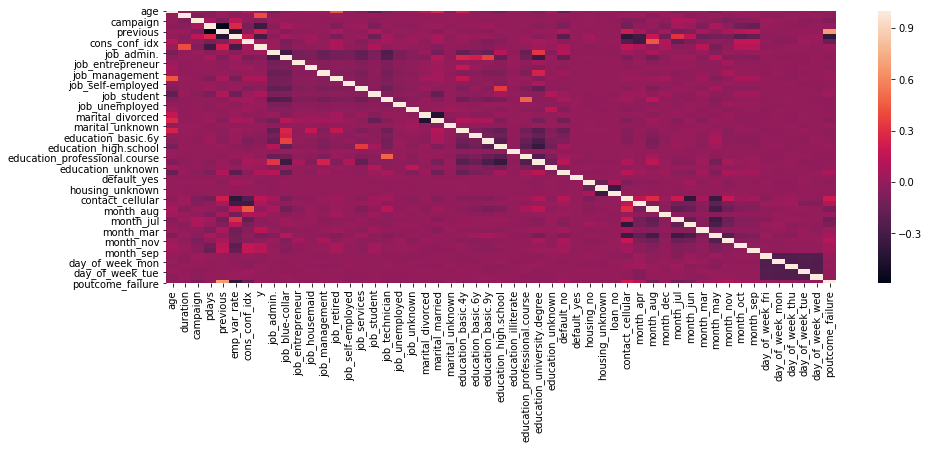

In [50]:
sns.heatmap(dataframe.corr(),annot=False)
plt.rcParams['figure.figsize'] = (10.0, 10.0)    # ... and big plots

In [55]:
dataframe.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_conf_idx,y,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.129372,0.030399,-0.102584,-0.024191,...,-0.067523,0.030045,0.053008,0.040889,0.007148,0.019027,-0.021356,0.019137,-0.023671,-0.002537
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,-0.008173,0.405274,-0.008918,0.012992,...,0.008054,-0.015941,0.015454,0.018011,-0.010343,-0.023068,0.014666,0.004140,0.014537,-0.013311
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,-0.013733,-0.066357,0.011745,-0.001775,...,-0.032704,-0.079028,-0.049126,-0.033953,0.026641,0.014405,0.005141,-0.025125,-0.021088,-0.068890
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,-0.091342,-0.324914,-0.025398,0.065335,...,0.070690,-0.016946,-0.128677,-0.154629,0.013782,0.001031,-0.008186,-0.007300,0.001021,0.006354
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.050936,0.230181,0.018888,-0.054845,...,-0.012534,0.081050,0.127754,0.157651,0.004404,-0.002012,0.001512,0.000090,-0.003929,0.682608
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.196041,-0.298334,-0.024572,0.057264,...,-0.111356,-0.105917,-0.213706,-0.170366,-0.015277,-0.018139,-0.007673,0.014582,0.026797,-0.381706
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,1.000000,0.054878,0.032341,-0.101567,...,-0.011740,-0.052892,0.170425,0.169175,-0.003104,-0.041382,-0.027877,0.050033,0.023711,-0.162592
y,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,0.054878,1.000000,0.031426,-0.074423,...,-0.108271,-0.011796,0.137366,0.126067,-0.006996,-0.021265,0.013888,0.008046,0.006302,0.031799
job_admin.,-0.102584,-0.008918,0.011745,-0.025398,0.018888,-0.024572,0.032341,0.031426,1.000000,-0.313313,...,-0.055052,0.008823,0.006538,0.010407,0.009892,-0.000736,-0.003970,-0.001835,-0.003112,0.002771
job_blue-collar,-0.024191,0.012992,-0.001775,0.065335,-0.054845,0.057264,-0.101567,-0.074423,-0.313313,1.000000,...,0.136311,-0.062053,-0.049034,-0.054309,0.003329,-0.009754,-0.007062,-0.006829,0.020673,-0.013254


# Delete correlated columns from the database

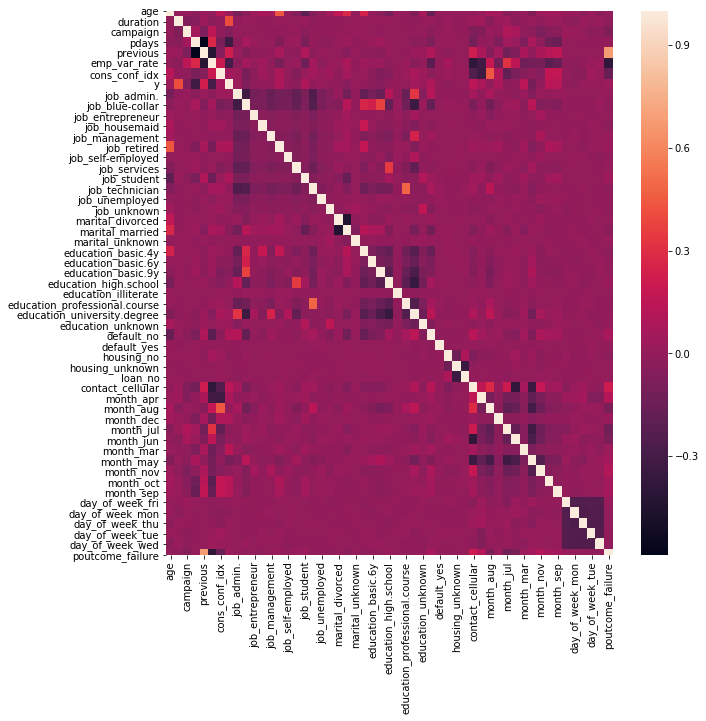

In [23]:
corr_matrix = dataframe.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in dataframe.columns if any(upper[column]>0.75)]
dataframe=dataframe.drop(to_drop,axis=1)    

plt.rcParams['figure.figsize'] = (10.0, 10.0)    # ... and big plots
sns.heatmap(dataframe.corr(),annot=False)

In [24]:
corr_matrix

,age,duration,campaign,pdays,previous,emp_var_rate,cons_conf_idx,y,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure
age,1.000000,0.000866,0.004594,0.034369,0.024365,0.000371,0.129372,0.030399,0.102584,0.024191,...,0.067523,0.030045,0.053008,0.040889,0.007148,0.019027,0.021356,0.019137,0.023671,0.002537
duration,0.000866,1.000000,0.071699,0.047577,0.020640,0.027968,0.008173,0.405274,0.008918,0.012992,...,0.008054,0.015941,0.015454,0.018011,0.010343,0.023068,0.014666,0.004140,0.014537,0.013311
campaign,0.004594,0.071699,1.000000,0.052584,0.079141,0.150754,0.013733,0.066357,0.011745,0.001775,...,0.032704,0.079028,0.049126,0.033953,0.026641,0.014405,0.005141,0.025125,0.021088,0.068890
pdays,0.034369,0.047577,0.052584,1.000000,0.587514,0.271004,0.091342,0.324914,0.025398,0.065335,...,0.070690,0.016946,0.128677,0.154629,0.013782,0.001031,0.008186,0.007300,0.001021,0.006354
previous,0.024365,0.020640,0.079141,0.587514,1.000000,0.420489,0.050936,0.230181,0.018888,0.054845,...,0.012534,0.081050,0.127754,0.157651,0.004404,0.002012,0.001512,0.000090,0.003929,0.682608
emp_var_rate,0.000371,0.027968,0.150754,0.271004,0.420489,1.000000,0.196041,0.298334,0.024572,0.057264,...,0.111356,0.105917,0.213706,0.170366,0.015277,0.018139,0.007673,0.014582,0.026797,0.381706
cons_conf_idx,0.129372,0.008173,0.013733,0.091342,0.050936,0.196041,1.000000,0.054878,0.032341,0.101567,...,0.011740,0.052892,0.170425,0.169175,0.003104,0.041382,0.027877,0.050033,0.023711,0.162592
y,0.030399,0.405274,0.066357,0.324914,0.230181,0.298334,0.054878,1.000000,0.031426,0.074423,...,0.108271,0.011796,0.137366,0.126067,0.006996,0.021265,0.013888,0.008046,0.006302,0.031799
job_admin.,0.102584,0.008918,0.011745,0.025398,0.018888,0.024572,0.032341,0.031426,1.000000,0.313313,...,0.055052,0.008823,0.006538,0.010407,0.009892,0.000736,0.003970,0.001835,0.003112,0.002771
job_blue-collar,0.024191,0.012992,0.001775,0.065335,0.054845,0.057264,0.101567,0.074423,0.313313,1.000000,...,0.136311,0.062053,0.049034,0.054309,0.003329,0.009754,0.007062,0.006829,0.020673,0.013254


# Prepare the database for further analysis

In [25]:
from sklearn.preprocessing import StandardScaler

# Evaluating the accuracy of the performed analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
#Setting up the training variables.
X = dataframe.iloc[:,:-1].values
Y = dataframe.iloc[:,-1].values

#Scaling the training dataset to have zero mean and a standard deviation of 1.
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)

The distance between the centroids is: 383.87 .


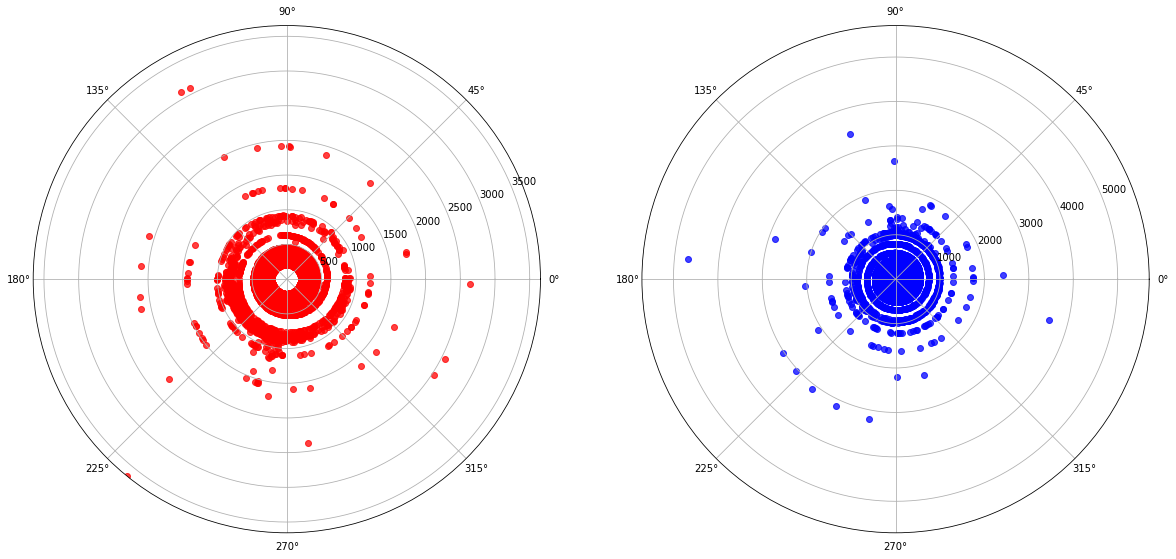

In [31]:
import scipy

def centroid_vector(t_array):
    return sum(t_array)/len(t_array)
    

def euclidean_distance(point,t_array):
    result =[]
    for el in t_array:
        result.append(scipy.spatial.distance.euclidean(point, el))
    return result

def angular_distribution(point,t_array):
    result = []
    for el in t_array:
        result.append((180.0/np.pi)*np.arccos(sum((a*b) for a, b in zip(point, el))/(np.linalg.norm(point)*np.linalg.norm(el))))
        
    return result


fraud = dataframe[dataframe["y"]==1]
notfraud = dataframe[dataframe["y"]==0]

print("The distance between the centroids is:", round(scipy.spatial.distance.euclidean(centroid_vector(fraud.values), centroid_vector(notfraud.values)),2),".")


theta_fraud = angular_distribution(centroid_vector(fraud.values),fraud.values)
theta_notfraud = angular_distribution(centroid_vector(notfraud.values),notfraud.values)

r_fraud = euclidean_distance(centroid_vector(fraud.values),fraud.values)
r_notfraud = euclidean_distance(centroid_vector(notfraud.values),notfraud.values)

fig = plt.figure()
ax1 = fig.add_subplot(121, polar=True)
c_fraud = ax1.scatter(theta_fraud, r_fraud, c='r', cmap='hsv', alpha=0.75)
ax1.set_thetamin(0)
ax1.set_thetamax(360)

ax2 = fig.add_subplot(122, polar=True)
c_notfraud = ax2.scatter(theta_notfraud, r_notfraud, c='b', cmap='hsv', alpha=0.75)
ax2.set_thetamin(0)
ax2.set_thetamax(360)

plt.rcParams['figure.figsize'] = (20.0, 20.0)    # ... and big plots
#ax3 = ax2.twinx()

#plt.show()

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

#Now it is time to start classifying the target data using the Logisitic Regression algorithm.
Log_Classifier = LogisticRegression()
Log_Classifier.fit(X_train,Y)
Y_pred_log = Log_Classifier.predict(X_train)

c_matrix_log = confusion_matrix(Y,Y_pred_log)
accgoal_log = accuracy_score(Y, Y_pred_log)
print(c_matrix_log)
print("The accuracy goal is:",round(accgoal_log*100,2),"%")

#sns.heatmap(c_matrix_log, annot=True, square=True, cmap = 'Blues_r')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[36850    86]
 [  105  4147]]
The accuracy goal is: 99.54 %


# Light Gradient Boosting algorithm

In [35]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# For this task we use a simple set of parameters to train the model. 
# I just want to create a baseline model, so I am not performing here cross validation or parameter tunning.

lgb_train = lgb.Dataset(X_train, Y, free_raw_data=False)
lgb_test = lgb.Dataset(X_train, Y, reference=lgb_train, free_raw_data=False)

parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300


clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

Y_prob_gb = clf.predict(X_train)

Y_pred_gb = np.where(Y_prob_gb > 0.5, 1, 0)
cmatrix_gb = confusion_matrix(Y,Y_pred_gb)
accgoal_gb = accuracy_score(Y, Y_pred_gb)
print(cmatrix_gb)
print("The accuracy goal is:", round(accgoal_gb*100,2),'%')


#plt.figure()
#sns.heatmap(cmatrix_gb, annot=True, square=True, cmap = 'Purples_r')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots
#print('-----------------------')

[[36935     1]
 [    0  4252]]
The accuracy goal is: 100.0 %


# Random Forest algorithm

In [36]:
from sklearn.ensemble import RandomForestClassifier

classif_rmd = RandomForestClassifier(min_samples_leaf=150)
classif_rmd.fit(X_train, Y)
Y_pred_rmf = classif_rmd.predict(X_train)
accgoal_rmf = accuracy_score(Y,Y_pred_rmf)
cmatrix_rmf = confusion_matrix(Y, Y_pred_rmf)
print(cmatrix_rmf)
print("The accuracy goal is:", round(accgoal_rmf*100,2),'%')

#sns.heatmap(cmatrix_rmf, annot=True, square=True, cmap = 'Greens_r')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.rcParams['figure.figsize'] = (5.0, 5.0)    # ... and big plots

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[36909    27]
 [  221  4031]]
The accuracy goal is: 99.4 %


# Empirical sigmoid function

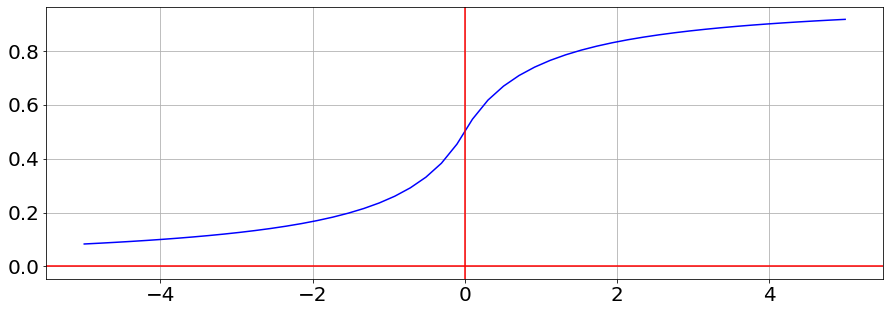

In [39]:
def empirical_sigmoid(x):
    return 0.5*(1.0 + x/(1.0+np.abs(x)))

xsig = np.linspace(-5,5,50)
ysig = empirical_sigmoid(xsig)

# plot visuals
f, ax = plt.subplots(figsize=(15, 5))
plt1 = plt.plot(xsig, ysig, color="blue")
plt.xticks(size=20,rotation=0)
plt.yticks(size=20,rotation=0)
ax.grid(True, which='both')
ax.axhline(y=0, color='r')
ax.axvline(x=0, color='r')

In [40]:
class Empirical_Classifier:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __empirical_class(self, z):
        return 0.5*(1.0 + z/(1.0+np.abs(z)))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__empirical_class(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print('floss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__empirical_class(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

model = Empirical_Classifier(lr=0.1, num_iter=300000)
%time model.fit(X_train, Y)
Y_pred_emp = model.predict(X_train)
params = model.theta

accgoal_emp = accuracy_score(Y,Y_pred_emp)
c_matrix_emp = confusion_matrix(Y, Y_pred_emp)
print(c_matrix_emp)
print("The accuracy goal is:", round(accgoal_emp*100,2),'%')

#sns.heatmap(c_matrix_emp, annot=True, square=True, cmap = 'Oranges_r')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

CPU times: user 2h 50min 25s, sys: 50min 15s, total: 3h 40min 41s
Wall time: 56min 52s
[[36821   115]
 [  147  4105]]
The accuracy goal is: 99.36 %


# Artificial Neural Networks

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense# Initialising the ANN
"Activation functions: 'sigmoid', 'tanh', 'relu'"
classifier = Sequential()# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 52))# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])# Fitting the ANN to the Training set
classifier.fit(X_train, Y, batch_size = 32, epochs = 250)

# Predicting the Test set results
Y_pred_ann = classifier.predict(X_train)
Y_pred_ann = (Y_pred_ann > 0.5)
accgoal_ann = accuracy_score(Y_pred_ann, Y)

cmatrix_ann = confusion_matrix(Y, Y_pred_ann) # rows = truth, cols = prediction
print(cmatrix_ann)
print("The accuracy goal is:", round(accgoal_ann*100,2),'%')

#sns.heatmap(cmatrix_ann, annot=True, square=True, cmap = 'Greys_r')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.rcParams['figure.figsize'] = (8.0, 8.0)    # ... and big plots

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/250
41188/41188 [==============================] - 3s 64us/step - loss: 0.1172 - accuracy: 0.9586
Epoch 2/250
41188/41188 [==============================] - 2s 44us/step - loss: 0.0163 - accuracy: 0.9954
Epoch 3/250
41188/41188 [==============================] - 2s 44us/step - loss: 0.0107 - accuracy: 0.9961
Epoch 4/250
41188/41188 [==============================] - 2s 44us/step - loss: 0.0094 - accuracy: 0.9963
Epoch 5/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0088 - accuracy: 0.9963
Epoch 6/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0083 - accuracy: 0.9964
Epoch 7/250
41188/41188 [==============================] - 2s 48us/step - loss: 0.0078 - accuracy: 0.9965
Epoch 8/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0076 - accuracy: 0.9968
Epoch 9/250
41188/41188 [==============================] 

41188/41188 [==============================] - 2s 44us/step - loss: 0.0027 - accuracy: 0.9990
Epoch 73/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0027 - accuracy: 0.9989
Epoch 74/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0025 - accuracy: 0.9990
Epoch 75/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0029 - accuracy: 0.9989
Epoch 76/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0029 - accuracy: 0.9990
Epoch 77/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0025 - accuracy: 0.9989
Epoch 78/250
41188/41188 [==============================] - 2s 44us/step - loss: 0.0026 - accuracy: 0.9988
Epoch 79/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0028 - accuracy: 0.9988
Epoch 80/250
41188/41188 [==============================] - 2s 44us/step - loss: 0.0028 - accuracy: 0.9989
Epoch 81/250
41188/41188 [========================

41188/41188 [==============================] - 2s 44us/step - loss: 0.0018 - accuracy: 0.9994
Epoch 149/250
41188/41188 [==============================] - 2s 45us/step - loss: 0.0023 - accuracy: 0.9991
Epoch 150/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0018 - accuracy: 0.9993
Epoch 151/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0018 - accuracy: 0.9993
Epoch 152/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0020 - accuracy: 0.9992
Epoch 153/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0018 - accuracy: 0.9993
Epoch 154/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0019 - accuracy: 0.9993
Epoch 155/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0018 - accuracy: 0.9994
Epoch 156/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0017 - accuracy: 0.9994
Epoch 157/250
41188/41188 [===============

Epoch 224/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0016 - accuracy: 0.9992
Epoch 225/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0017 - accuracy: 0.9992
Epoch 226/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0017 - accuracy: 0.9992
Epoch 227/250
41188/41188 [==============================] - 2s 44us/step - loss: 0.0016 - accuracy: 0.9993
Epoch 228/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0016 - accuracy: 0.9993
Epoch 229/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0017 - accuracy: 0.9993
Epoch 230/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0016 - accuracy: 0.9993
Epoch 231/250
41188/41188 [==============================] - 2s 42us/step - loss: 0.0016 - accuracy: 0.9992
Epoch 232/250
41188/41188 [==============================] - 2s 43us/step - loss: 0.0016 - accuracy: 0.9994
Epoch 233/250
41188/41188 [=

# Comparison between the different classification algorithms

In [47]:
log_entry.sort_values(by=["Accuracy"])

,Classifier,Accuracy
4,Empirical Sigmoid,0.993639
5,Random Forest,0.993979
3,Logistic Regression,0.995363
2,Artificial Neural Networks,0.999417
1,Light Gradient Boosting,0.999976
0,kNN,1.000000


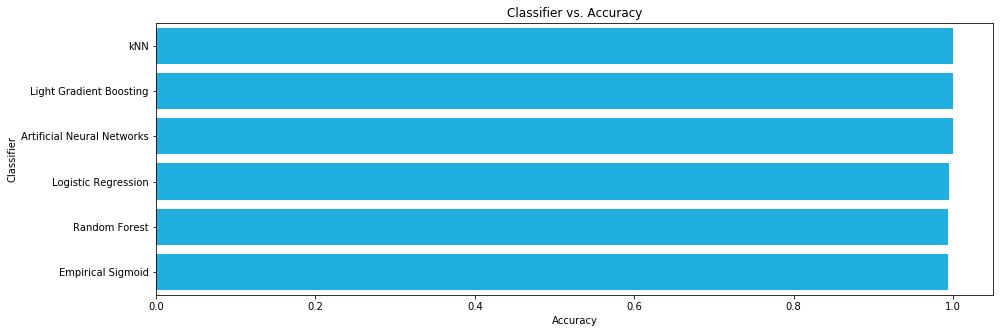

In [48]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
log_entry = pd.DataFrame([['kNN',accgoaal_knn],['Light Gradient Boosting',accgoal_gb],['Artificial Neural Networks',accgoal_ann],['Logistic Regression',accgoal_log],['Random Forest', accgoal_rmf],['Empirical Sigmoid', accgoal_emp]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier vs. Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="deepskyblue")  
plt.rcParams['figure.figsize'] = (15.0, 5.0)    # ... and big plots
plt.show()